In [1]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)
from colors import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [3]:
init_notebook()
figsize = (7,1.65)
fontsize = 11

In [4]:
Fig.config(fontsize, figsize)

In [5]:
dataf = "../../data/instrumentationoverhead.csv"

In [6]:
!sha256sum $dataf

75816dc2ac4dead6c8a22b4665205d5879a9bf088ae2393e60a2e00bee559155  ../../data/instrumentationoverhead.csv


In [7]:
df = pd.read_csv(dataf)
df.index = df['workload']
del df['workload']
del df['msynctime']

In [8]:
df

,uninstrumented,instrumented
workload,,
a,987338274,1080908146
b,1090359414,1123247836
c,1005005259,1027431385
d,1172020352,1227288822
e,347163782,375749449
f,1209833090,1321134528
g,878902515,1002047352


In [9]:
df_norm = df.T/df['uninstrumented'].T
df_norm = df_norm.T

In [10]:
df_norm

,uninstrumented,instrumented
workload,,
a,1.0,1.094770
b,1.0,1.030163
c,1.0,1.022314
d,1.0,1.047157
e,1.0,1.082341
f,1.0,1.091997
g,1.0,1.140112


Plot saved as `plots/pathfinding/instrumentationoverhead.png`

Plot saved as `plots/pathfinding/instrumentationoverhead.png`

Using pdfcrop on `plots/pathfinding/instrumentationoverhead.png` with command `pdfcrop plots/pathfinding/instrumentationoverhead.pdf plots/pathfinding/instrumentationoverhead.pdf`

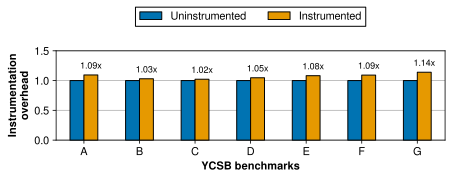

In [16]:
plt.rcParams["font.family"] = "freesans"
df_norm = capitalize_index(capitalize_index(df_norm.T).T)
# cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["red","green","green"])
ax = df_norm.plot.bar(**Fig.get_kwargs(cmap=None))
f = Fig(ax)
ax.set_ylim((0, 1.5))

f.fmt_legend()
# f.fmt_label('YCSB benchmarks', 'Relative performance')
f.fmt_label('YCSB benchmarks', 'Instrumentation\noverhead')
f.add_bar_labels([False, True], precision=2, fontsize=fontsize-2, over_fig=False, alpha=0)
f.xrot(rot=0)
f.fmt_grid(axis='y')
ax.set_yticks(np.arange(0, 1.6, 0.5))
save_fig('instrumentationoverhead')

In [12]:
df_norm

,Uninstrumented,Instrumented
workload,,
A,1.0,1.094770
B,1.0,1.030163
C,1.0,1.022314
D,1.0,1.047157
E,1.0,1.082341
F,1.0,1.091997
G,1.0,1.140112
